<a href="https://colab.research.google.com/github/Vice10/ds_notebooks/blob/main/feature_extraction_imbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from tensorflow import keras
%matplotlib inline
!pip install yellowbrick

     |████████████████████████████████| 274 kB 13.8 MB/s 


In [ ]:
df = pd.read_csv("./HTRU_2.csv")
df.head()

,Mean,SD,Excess,Skewness,Mean_DM,SD_DM,Excess_DM,Skewness_DM,Y
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:
df.describe()

,Mean,SD,Excess,Skewness,Mean_DM,SD_DM,Excess_DM,Skewness_DM,Y
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [ ]:
df.index[]

1

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


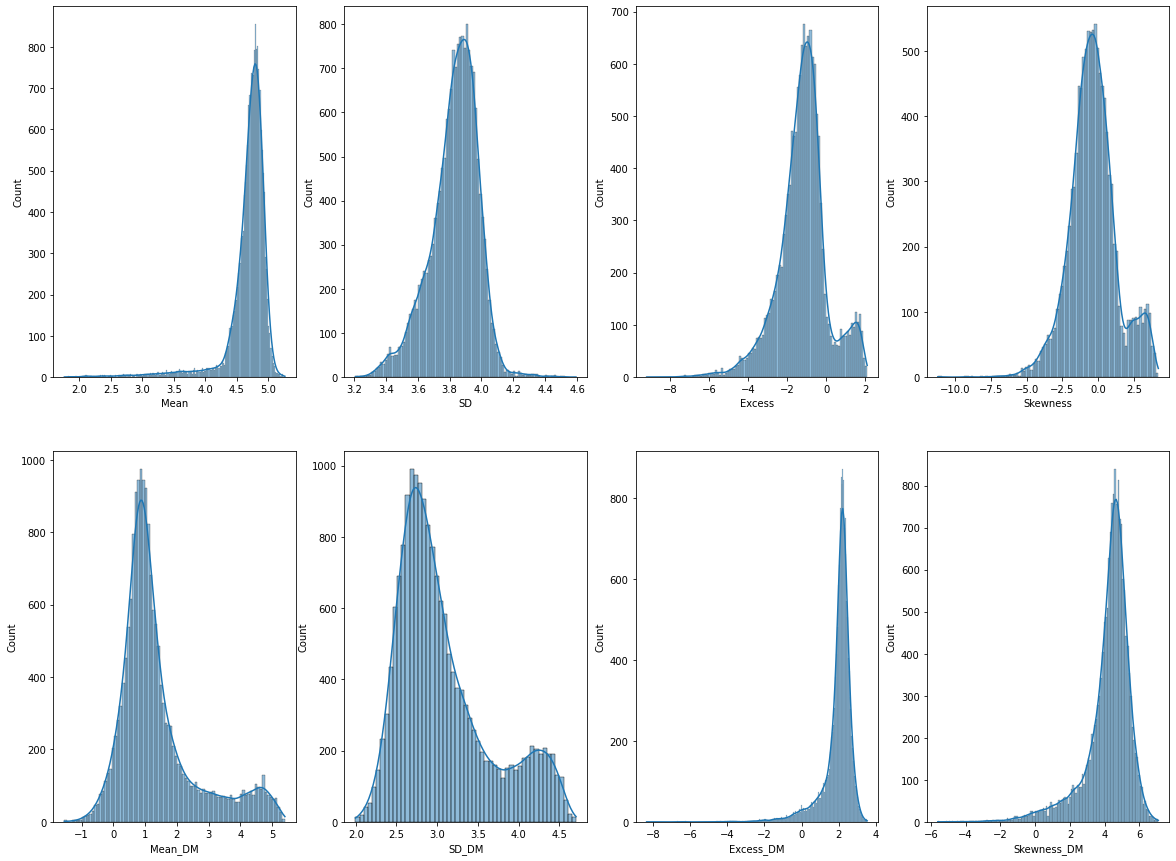

In [ ]:
fig, axs = plt.subplots(2,4, figsize=(20,15))
k = -1
for col in df.drop(columns='Y').columns:
  k += 1
  i = int(k / 4)
  j = k % 4
  sns.histplot(data=np.log(df[col]), kde=True, ax=axs[i,j])

In [ ]:
print(len(df[df['Y'] == 0]) / len(df))
df.info()

0.908425522404738
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Mean         17898 non-null  float64
 1   SD           17898 non-null  float64
 2   Excess       17898 non-null  float64
 3   Skewness     17898 non-null  float64
 4   Mean_DM      17898 non-null  float64
 5   SD_DM        17898 non-null  float64
 6   Excess_DM    17898 non-null  float64
 7   Skewness_DM  17898 non-null  float64
 8   Y            17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


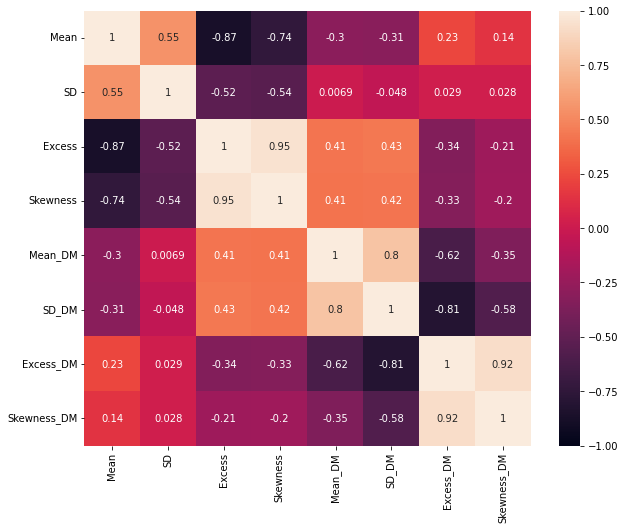

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(columns='Y').corr(), vmin=-1, vmax=1, annot=True)

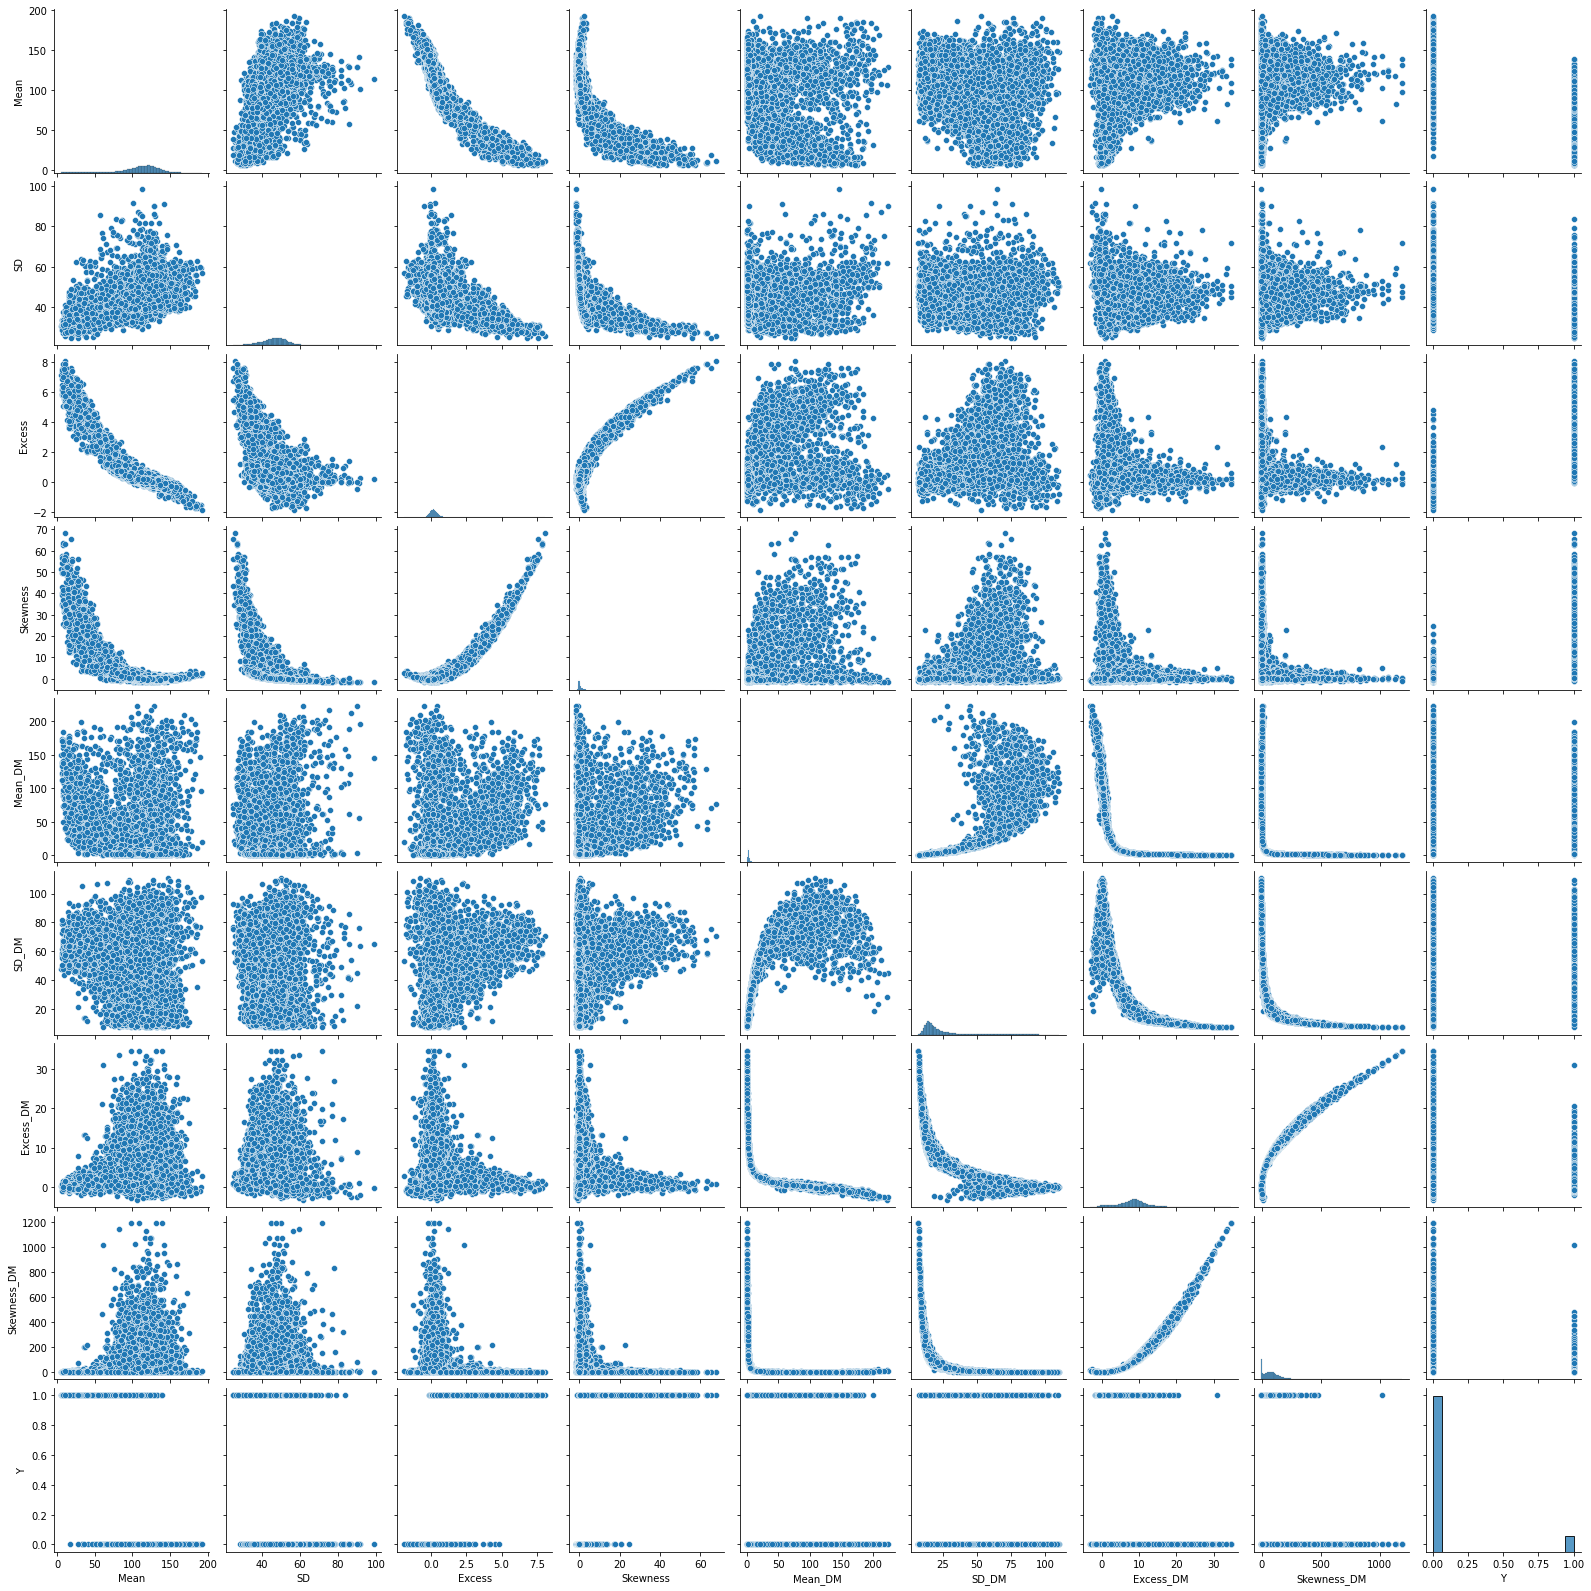

In [ ]:
sns.pairplot(df)

In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from matplotlib.pyplot import figure
from xgboost import XGBClassifier
from yellowbrick.model_selection import learning_curve

In [ ]:
def random_forest(d_frame, title):
  X = d_frame.drop(['Y'], axis = 1)
  Y = d_frame['Y']
  Y = LabelEncoder().fit_transform(Y)
  X = StandardScaler().fit_transform(X)

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                      test_size = 0.2, 
                                                      random_state = 101)
  start = time.process_time()
  model = RandomForestClassifier(n_estimators=1000).fit(X_train, Y_train)
  print("Training time: ", '%.1f'%(time.process_time() - start))
  predictions = model.predict(X_test)
  #display_train_test_curves(model, X, Y)
  display_roc_auc(model, X_test, Y_test, title)
  print(classification_report(Y_test, predictions))
  ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test)

def display_roc_auc(model, X_test, y_test, title):
  lr_probs = model.predict_proba(X_test)[:, 1]
  ns_probs = [_ for _ in range(len(y_test))]
  ns_auc = roc_auc_score(y_test, ns_probs)
  lr_auc = roc_auc_score(y_test, lr_probs)
  print('Guess: ROC AUC=%.3f' % (ns_auc))
  print('Logistic: ROC AUC=%.3f' % (lr_auc))
  ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Guess')
  pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
  pyplot.title(title)
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  pyplot.legend()
  pyplot.show()

def display_train_test_curves(model, X, Y):
  print(learning_curve(model, X, Y, cv=5, scoring='accuracy'))

### No FE

Training time:  31.0
Guess: ROC AUC=0.496
Logistic: ROC AUC=0.983


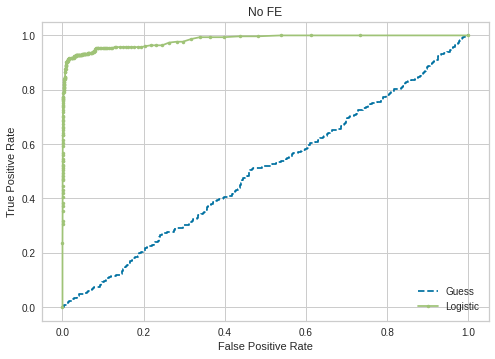

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3278
           1       0.92      0.88      0.90       302

    accuracy                           0.98      3580
   macro avg       0.95      0.94      0.94      3580
weighted avg       0.98      0.98      0.98      3580



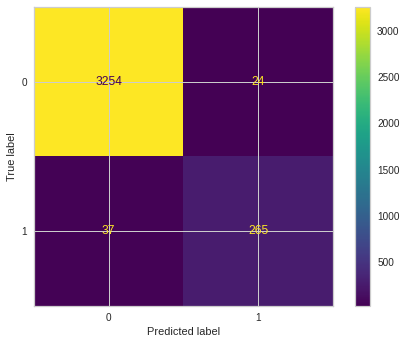

In [ ]:
random_forest(df, 'No FE')

### Clustering

In [ ]:
X = df.drop(['Y'], axis = 1)
Y = df['Y']
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)

/usr/local/lib/python3.7/dist-packages/yellowbrick/utils/kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:361: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


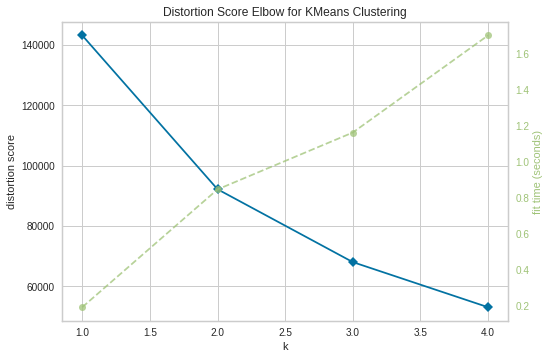

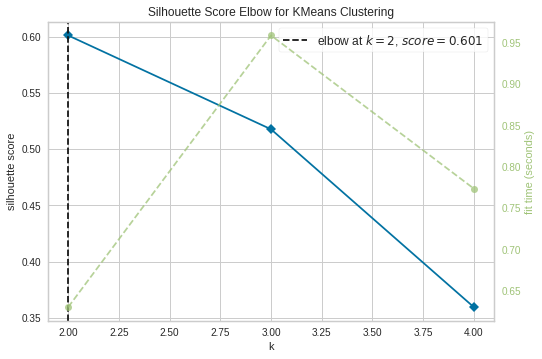

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,5), timings= True)
visualizer.fit(X)
visualizer.show()
visualizer = KElbowVisualizer(model, k=(2,5),metric='silhouette', timings= True)
visualizer.fit(X)
visualizer.show()  

### PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, df['Y']], axis = 1)
PCA_df['Y'] = LabelEncoder().fit_transform(PCA_df['Y'])
print(pca.explained_variance_ratio_)
PCA_df.head(10)

[0.51675584 0.26807564]


,PC1,PC2,Y
0,-1.278849,-1.273133,0
1,-1.020553,-0.201162,0
2,0.188289,0.432114,0
3,-1.015466,-1.469881,0
4,-0.822626,2.123651,0
5,-0.451877,0.781591,0
6,-2.882722,2.285347,0
7,-1.458360,1.007412,0
8,-0.670243,-0.060251,0
9,0.305085,0.298898,0


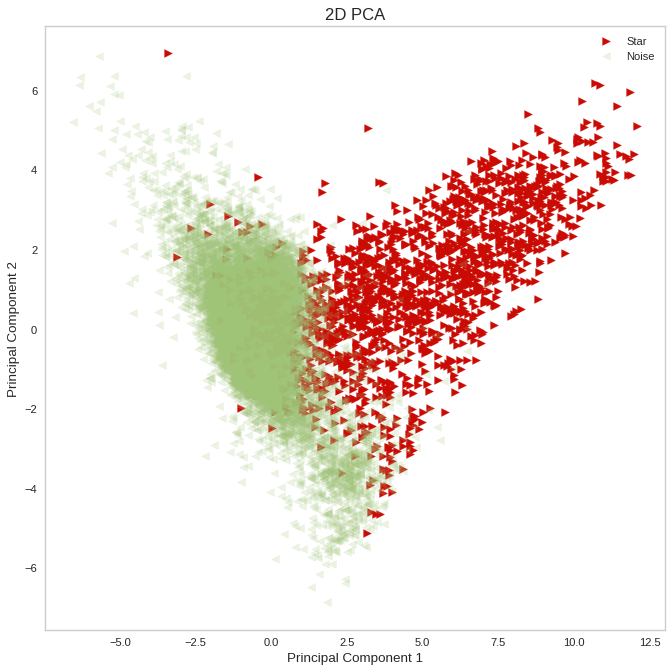

In [ ]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
transperancy = [1, 0.2]
colors = ['r', 'g']
markers = ['>', '<']
for cl, color, m, t in zip(classes, colors, markers, transperancy):
    plt.scatter(PCA_df.loc[PCA_df['Y'] == cl, 'PC1'], 
                PCA_df.loc[PCA_df['Y'] == cl, 'PC2'],
                marker=m, 
                alpha = t,
                c = color,
                s=50)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Star', 'Noise'])
plt.grid()

[0.51675584 0.26807564 0.10116862 0.0571781 ]


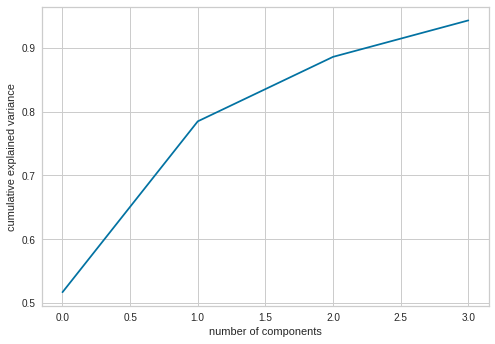

In [ ]:
pca2 = PCA(n_components=4)
pca2.fit_transform(X)
print(pca2.explained_variance_ratio_)
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
initial_features_names = list(df.columns)
initial_features_names.remove('Y')
n_pcs = pca2.components_.shape[0]
most_important_names = [np.abs(pca2.components_[i]).argmax() for i in range(n_pcs)]
comp_names = []
init_idxs = []
feat_names = []
expl_var = []
for i in range(n_pcs):
  comp_names.append('PC{}'.format(i))
  init_idxs.append(most_important_names[i])
  feat_names.append(initial_features_names[most_important_names[i]])
  expl_var.append(pca2.explained_variance_ratio_[i])
comps = pd.DataFrame(columns=['Component', 'Initial Index', 'Feature Name', 'Explained Variance'])
comps['Component'] = comp_names
comps['Initial Index'] = init_idxs
comps['Feature Name'] = feat_names
comps['Explained Variance'] = expl_var

In [ ]:
comps.head(10)

,Component,Initial Index,Feature Name,Explained Variance
0,PC0,2,Excess,0.516756
1,PC1,1,SD,0.268076
2,PC2,7,Skewness_DM,0.101169
3,PC3,1,SD,0.057178


/usr/local/lib/python3.7/dist-packages/yellowbrick/utils/kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:361: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


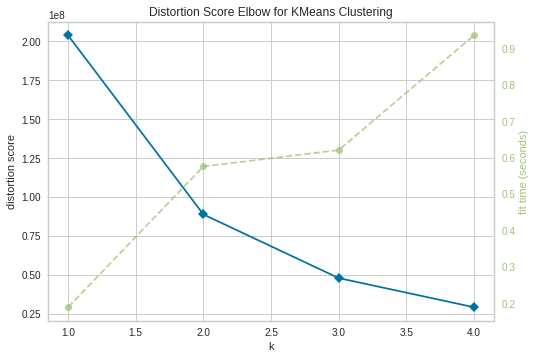

Training time:  19.7
Guess: ROC AUC=0.496
Logistic: ROC AUC=0.975


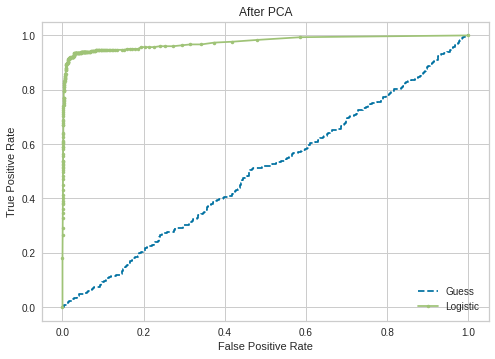

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3278
           1       0.91      0.87      0.89       302

    accuracy                           0.98      3580
   macro avg       0.95      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580



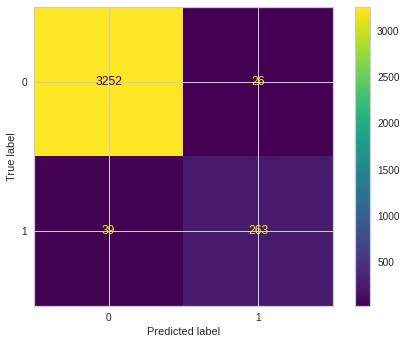

In [ ]:
feat_names = list(dict.fromkeys(feat_names))
df_pca = df[feat_names].copy()
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,5), timings= True)
visualizer.fit(df_pca)
visualizer.show()
df_pca.insert(0, 'Y', df['Y'])
random_forest(df_pca, 'After PCA')

### TSNE

In [ ]:
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=150, n_iter=500).fit_transform(X)
print('Time elapsed: {} seconds'.format(time.time()-time_start))
TSNE_df = pd.DataFrame(data = tsne, columns = ['N1', 'N2'])
TSNE_df = pd.concat([TSNE_df, df['Y']], axis = 1)
TSNE_df['Y'] = LabelEncoder().fit_transform(TSNE_df['Y'])
TSNE_df.head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 451 nearest neighbors...
[t-SNE] Indexed 17898 samples in 0.035s...
[t-SNE] Computed neighbors for 17898 samples in 8.467s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17898
[t-SNE] Computed conditional probabilities for sample 2000 / 17898
[t-SNE] Computed conditional probabilities for sample 3000 / 17898
[t-SNE] Computed conditional probabilities for sample 4000 / 17898
[t-SNE] Computed conditional probabilities for sample 5000 / 17898
[t-SNE] Computed conditional probabilities for sample 6000 / 17898
[t-SNE] Computed conditional probabilities for sample 7000 / 17898
[t-SNE] Computed conditional probabilities for sample 8000 / 17898
[t-SNE] Computed conditional probabilities for sample 9000 / 17898
[t-SNE] Computed conditional probabilities for sample 10000 / 17898
[t-SNE] Computed conditional probabilities for sample 11000 / 17898
[t-SNE] Computed conditional probabilities for sample 12000 / 17898
[t-SNE] Computed conditional probabilities for sa

,N1,N2,Y
0,-21.501366,1.911518,0
1,-22.254238,9.551064,0
2,12.771315,-9.513228,0
3,-22.631203,1.155259,0
4,17.841528,14.784997,0
5,10.636497,6.018394,0
6,13.681601,25.957201,0
7,10.829135,14.876977,0
8,-10.745273,17.112988,0
9,12.591036,-9.849822,0


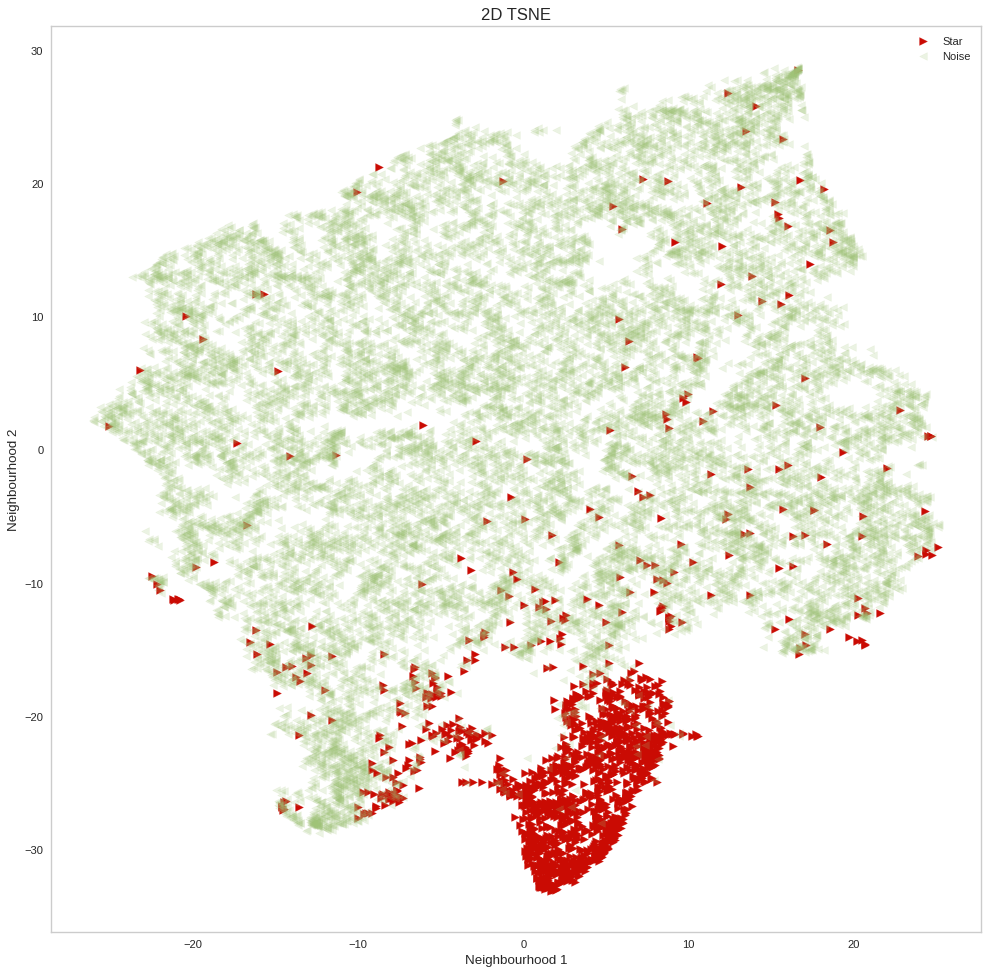

In [ ]:
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['r', 'g']
markers = ['>', '<']
transperancy = [1, 0.2]
for cl, color, m, t in zip(classes, colors, markers, transperancy):
    plt.scatter(TSNE_df.loc[TSNE_df['Y'] == cl, 'N1'], 
                TSNE_df.loc[TSNE_df['Y'] == cl, 'N2'], 
                marker=m,
                alpha=t,
                c = color)
    
plt.xlabel('Neighbourhood 1', fontsize = 12)
plt.ylabel('Neighbourhood 2', fontsize = 12)
plt.title('2D TSNE', fontsize = 15)
plt.legend(['Star', 'Noise'])
plt.grid()

### Isomap

In [ ]:
from sklearn.manifold import Isomap
time_start = time.time()
isomap = Isomap(n_components=2).fit_transform(X)
print('Time elapsed: {} seconds'.format(time.time()-time_start))
Isomap_df = pd.DataFrame(data = isomap, columns = ['N1', 'N2'])
Isomap_df = pd.concat([Isomap_df, df['Y']], axis = 1)
Isomap_df['Y'] = LabelEncoder().fit_transform(Isomap_df['Y'])
Isomap_df.head(10)

Time elapsed: 311.43238735198975 seconds


,N1,N2,Y
0,-1.079372,-1.950554,0
1,-1.512153,-0.870674,0
2,0.212370,0.845506,0
3,-0.632483,-1.998845,0
4,-2.382996,3.142584,0
5,-1.203212,0.926479,0
6,-6.243713,2.841834,0
7,-2.992451,0.903474,0
8,-0.966382,-0.125325,0
9,0.308392,0.607083,0


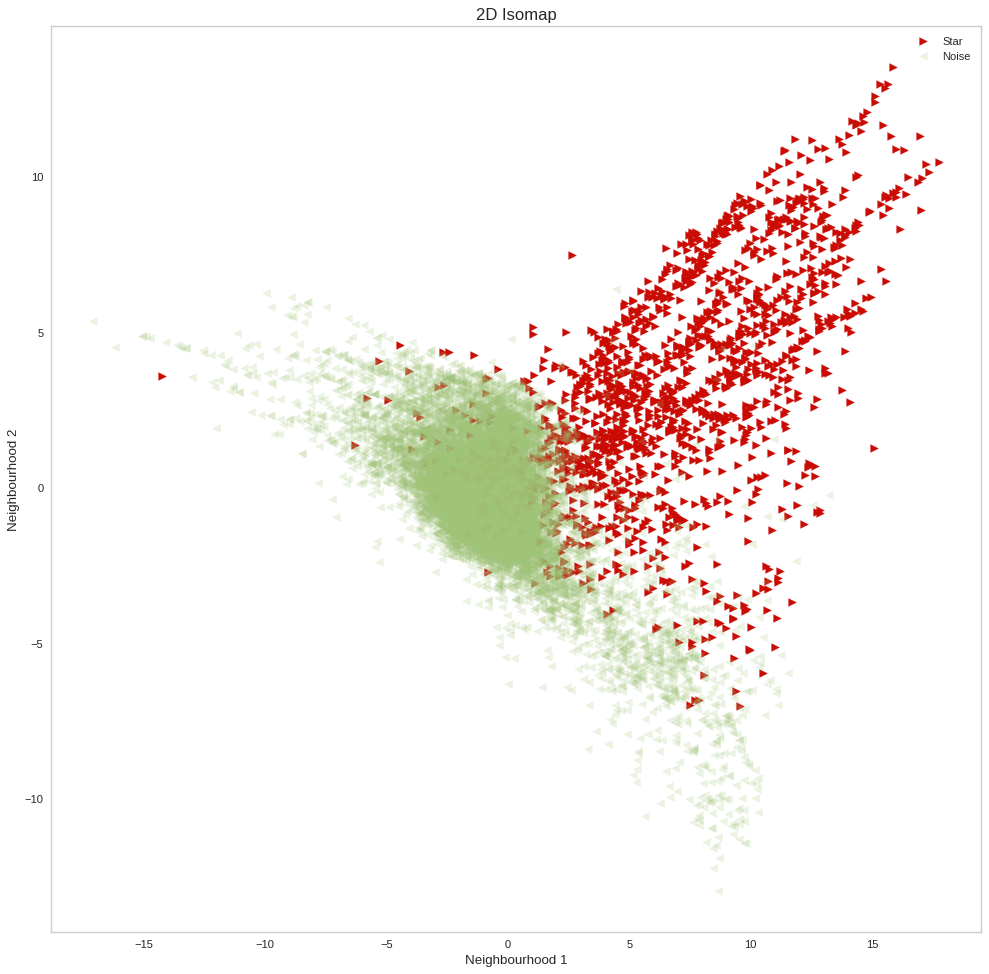

In [ ]:
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['r', 'g']
markers = ['>', '<']
transperancy = [1, 0.2]
for cl, color, m, t in zip(classes, colors, markers, transperancy):
    plt.scatter(Isomap_df.loc[Isomap_df['Y'] == cl, 'N1'], 
                Isomap_df.loc[Isomap_df['Y'] == cl, 'N2'], 
                marker=m,
                alpha=t,
                c = color)
    
plt.xlabel('Neighbourhood 1', fontsize = 12)
plt.ylabel('Neighbourhood 2', fontsize = 12)
plt.title('2D Isomap', fontsize = 15)
plt.legend(['Star', 'Noise'])
plt.grid()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
steps = [('iso', Isomap(n_components=4)), ('m', RandomForestClassifier(n_estimators=1000))]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                      test_size = 0.2, 
                                                      random_state = 101)
model = Pipeline(steps=steps).fit(X_train, Y_train)

Guess: ROC AUC=0.496
Logistic: ROC AUC=0.968


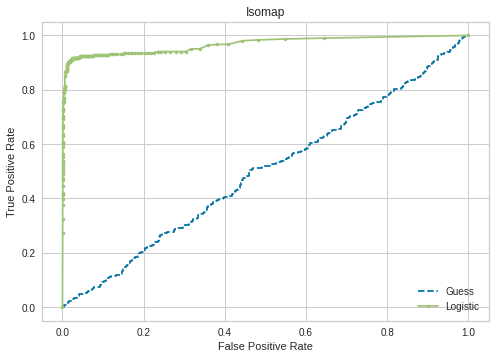

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3278
           1       0.93      0.84      0.89       302

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



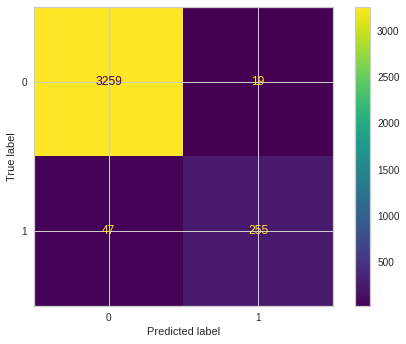

In [ ]:
display_roc_auc(model, X_test, Y_test, "Isomap")
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))
ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test)